<a href="https://colab.research.google.com/github/ayushiiGeoradverse3/Waste-analysis-worldwide/blob/main/waste%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
pip install dash plotly pandas

In [77]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
df = pd.DataFrame(pd.read_csv("/Composition of Municipal Waste (latest year).csv"))

Raw Data:
   CountryID              Country  Latest year available Paper, paperboard  \
0        8.0              Albania                 2015.0              9.90   
1       12.0              Algeria                 2017.0              9.75   
2       20.0              Andorra                 2016.0             19.00   
3       24.0               Angola                 2008.0             11.90   
4       28.0  Antigua and Barbuda                 2006.0             18.80   

   Footnotes Organic material  Footnotes.1 Plastics  Footnotes.2  Glass  \
0        NaN            51.40          NaN     9.60          NaN   4.50   
1        NaN            54.40          NaN    16.88          NaN   1.16   
2        NaN            25.50          NaN    18.90          1.0   7.20   
3        3.0            51.81          3.0    13.49          3.0   6.68   
4        NaN            25.20          NaN    19.50          NaN  13.70   

   Footnotes.3 Metals  Footnotes.4 Textiles  Footnotes.5  \
0         

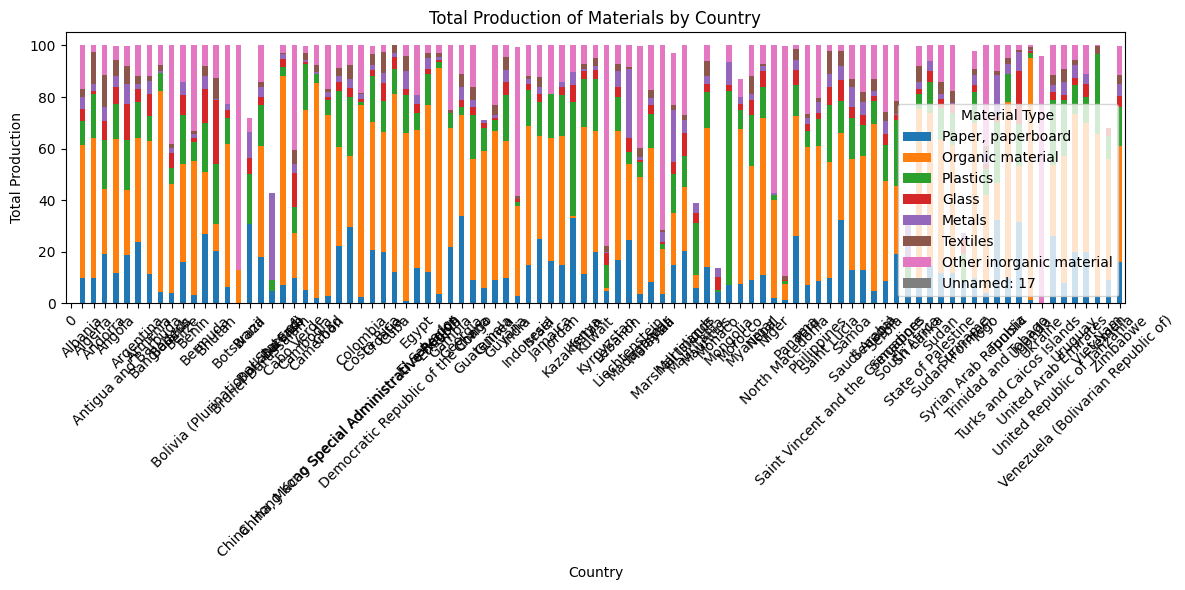


Top 5 countries for Paper, paperboard:
                             Country  Paper, paperboard
34                           Georgia              34.00
44                        Kazakhstan              33.30
68  Saint Vincent and the Grenadines              32.30
82               Trinidad and Tobago              32.22
84          Turks and Caicos Islands              31.50

Top 5 countries for Organic material:
       Country  Organic material
85      Uganda             93.80
32    Ethiopia             87.62
21    Cameroon             83.40
18     Burundi             81.00
7   Bangladesh             77.70

Top 5 countries for Plastics:
                 Country  Plastics
58              Mongolia     75.11
44            Kazakhstan     44.30
91              Viet Nam     30.94
73             Singapore     25.62
87  United Arab Emirates     24.96

Top 5 countries for Glass:
                     Country  Glass
12                    Bhutan  25.00
84  Turks and Caicos Islands  20.54
4        A

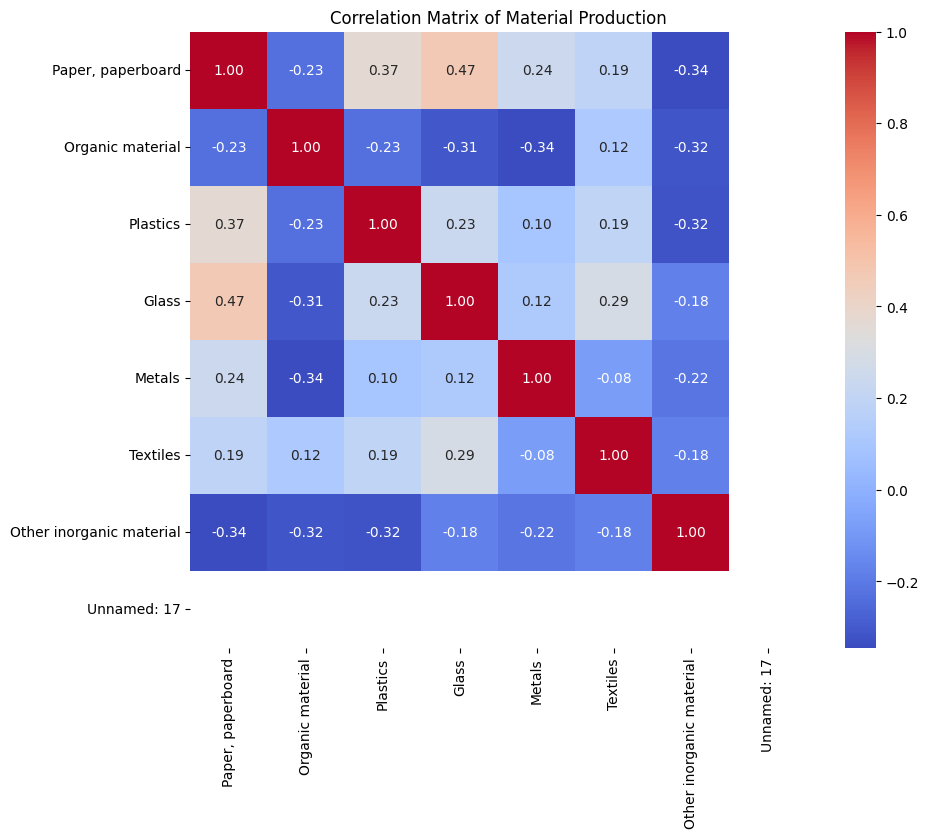

In [78]:
try:
    print("Raw Data:")
    print(pd.read_csv("/Composition of Municipal Waste (latest year).csv", sep=',', encoding='utf-8').head())
    df = pd.read_csv("/Composition of Municipal Waste (latest year).csv", sep=',', encoding='utf-8')
except Exception as e:
    print(f"Failed to read csv. Error: {e}")
    raise

#RAW DATA
print("\nInitial DataFrame (df):")
print(df.head())
print(f"\nInitial DataFrame (df) shape: {df.shape}")
print("\nDataFrame Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDescriptive Statistics:")
print(df.describe())

# Data Cleaning
data_cleaned = df.drop(columns=[col for col in df.columns if 'Footnotes' in col])

# Display Cleaned Data
print(f"\nCleaned DataFrame (data_cleaned) shape: {data_cleaned.shape}")

# Rename duplicate columns if they exist
cols = pd.Series(data_cleaned.columns)
for dup in cols[cols.duplicated()].unique():
    cols[cols[cols == dup].index.tolist()] = [dup + '.' + str(i) if i != 0 else dup for i in range(sum(cols == dup))]
data_cleaned.columns = cols
for col in data_cleaned.columns[3:]:
    data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')
print("\nColumns after numeric conversion:")
print(data_cleaned.columns)
print("\nMissing Values after conversion:")
print(data_cleaned.isnull().sum())

# Fill missing values with 0 (because i want to calculate a numeric statistical analysis)
data_cleaned.fillna(0, inplace=True)

# Ensure 'Country' is in the columns before trying to group by it.
if 'Country' not in data_cleaned.columns:
    print("\n'Country' column is not present in data_cleaned.")
else:
    total_production = data_cleaned.groupby('Country')[data_cleaned.columns[3:]].sum().reset_index()
    print("\nTotal Production:")
    print(total_production)
    numeric_cols = total_production.select_dtypes(include='number').columns
    if len(numeric_cols) > 0:
        if 'Country' in total_production.columns:
            total_production.set_index('Country').plot(kind='bar', stacked=True, figsize=(12, 6))
            plt.title('Total Production of Materials by Country')
            plt.xlabel('Country')
            plt.ylabel('Total Production')
            plt.legend(title='Material Type')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        else:
            print("\n'Country' column is not present in total_production.")
    else:
        print("\nNo numeric columns to plot in total_production.")
    top_countries = {}
    for col in data_cleaned.columns[3:]:
        top_countries[col] = data_cleaned.nlargest(5, col)[['Country', col]]
    for material, df in top_countries.items():
        print(f"\nTop 5 countries for {material}:")
        print(df)
    if len(numeric_cols) > 0:
        correlation_matrix = total_production[numeric_cols].corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
        plt.title('Correlation Matrix of Material Production')
        plt.show()
    else:
        print("\nNo numeric columns to create correlation matrix from.")

# **Data Loading and Preparation ✅**

In [79]:
comp_muni = pd.read_csv('/Composition of Municipal Waste (latest year).csv')
hazard_percap = pd.read_csv('/Hazardous waste generated per capita.csv')
hazard_gen = pd.read_csv('/Hazardous waste generated.csv')
muni_collect = pd.read_csv('/Municipal waste collected.csv')

# ***Data Cleaning*** ✅

In [80]:
def clean_hazardous_data(df):
    df = df.loc[:, ~df.columns.str.contains('Footnote')]
    return df.melt(id_vars=['CountryID', 'Country'],
                   var_name='Year',
                   value_name='Value')

hazard_percap_long = clean_hazardous_data(hazard_percap)
hazard_gen_long = clean_hazardous_data(hazard_gen)

# ***Time Series Analysis (Example: Hazardous Waste)*** ⏱

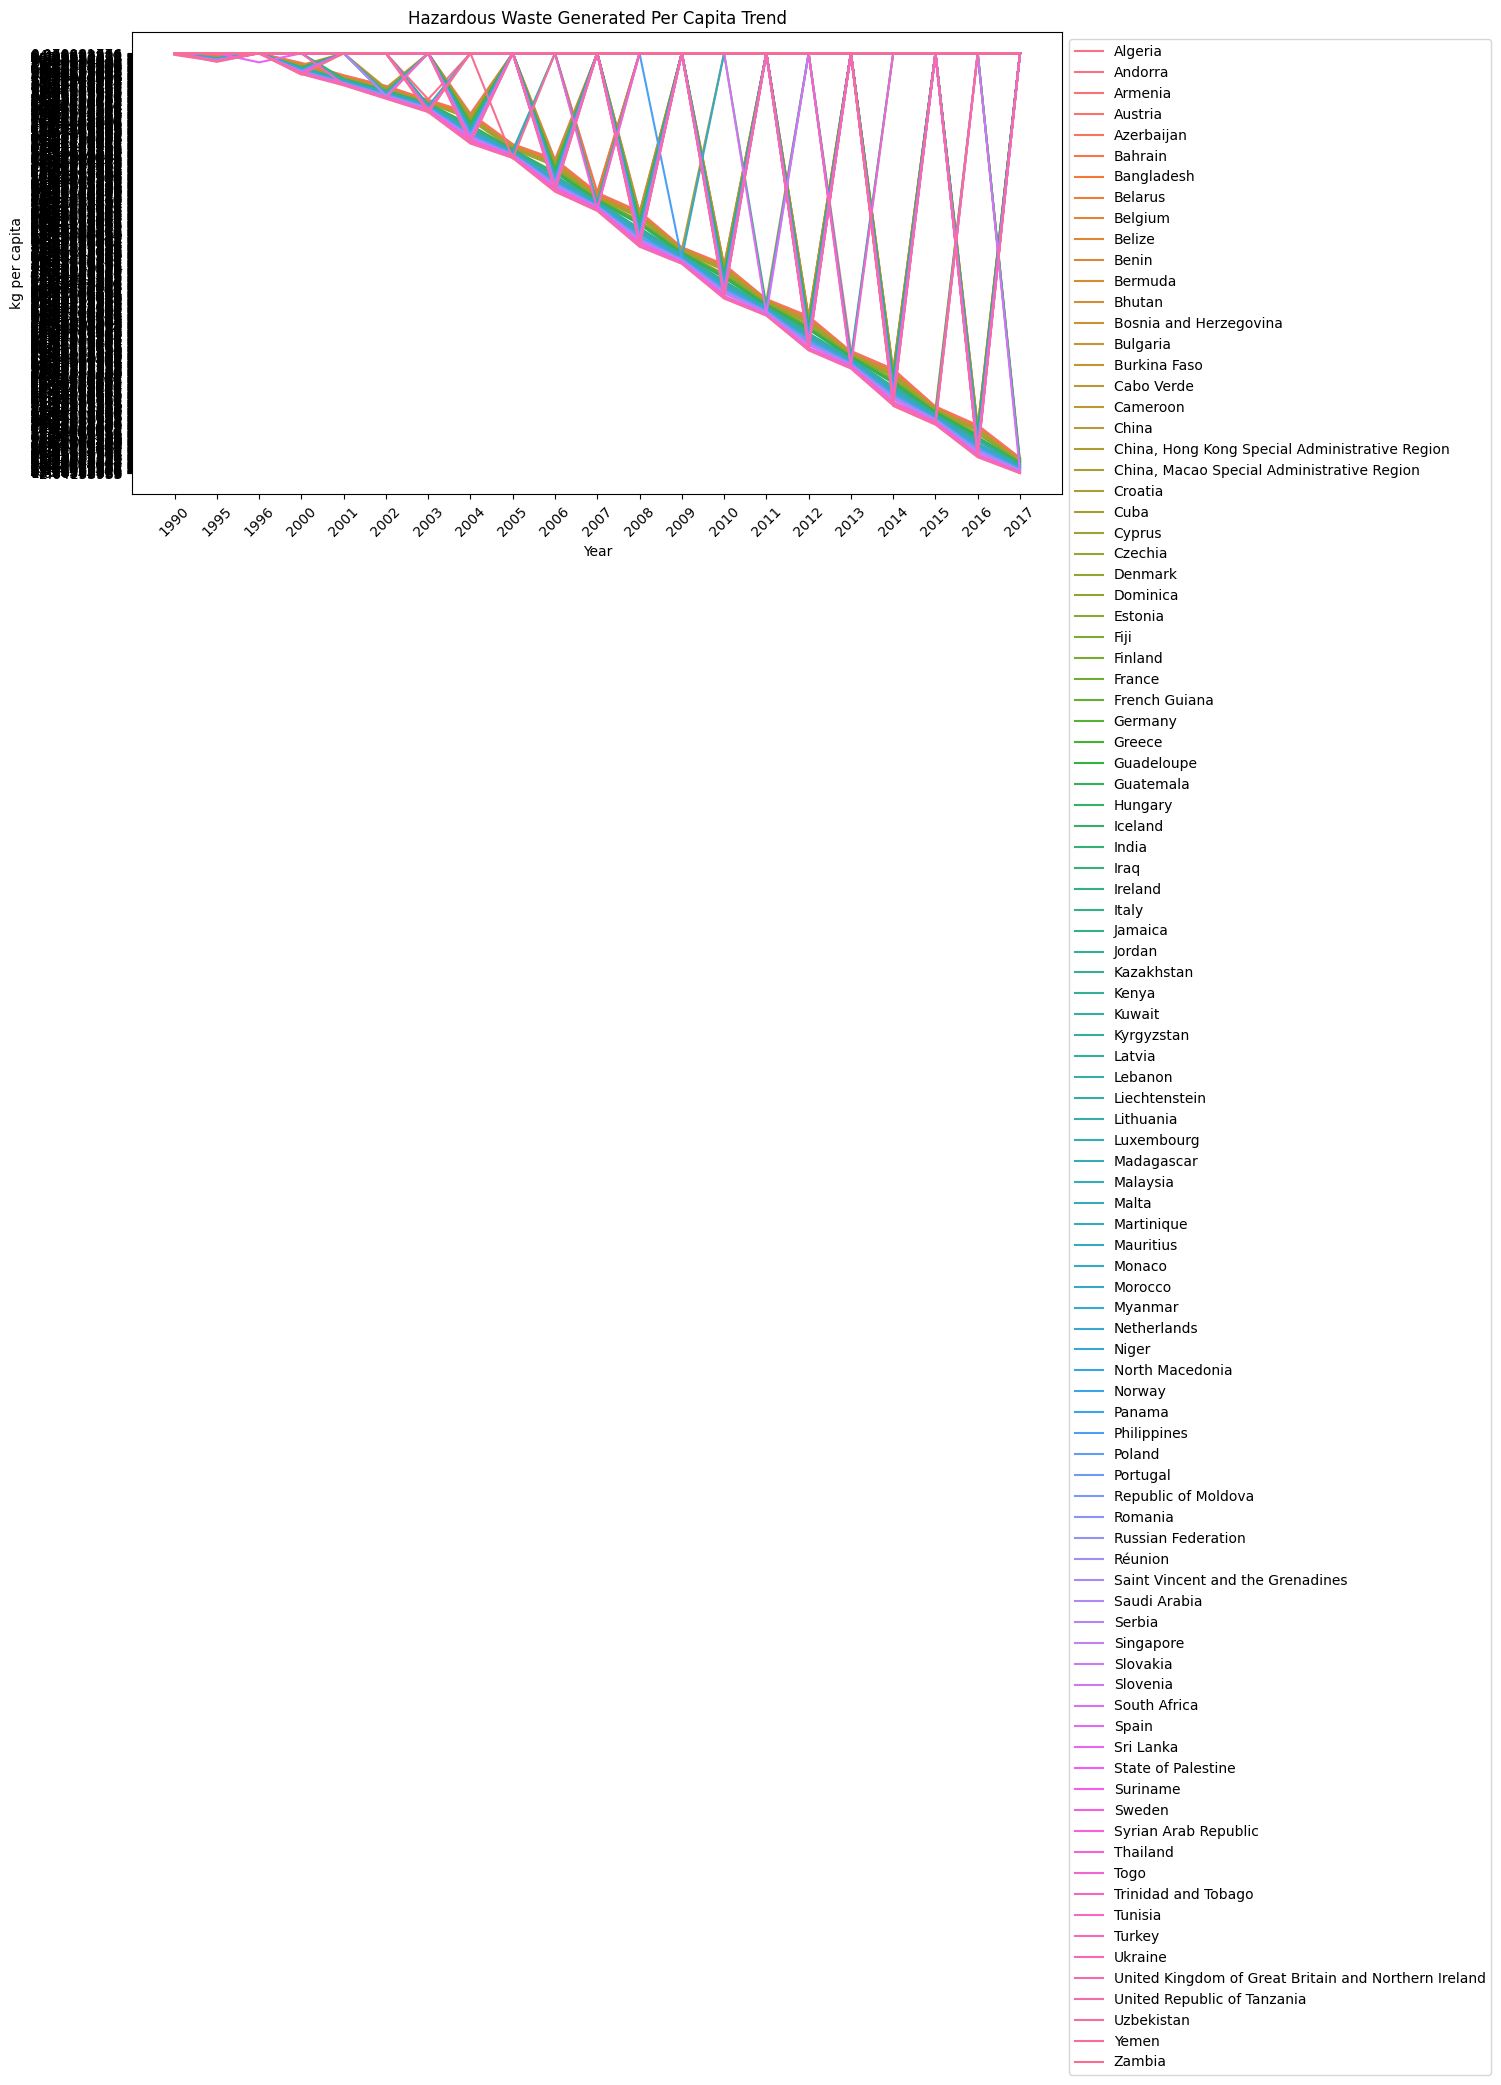

In [81]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hazard_percap_long, x='Year', y='Value', hue='Country')
plt.title('Hazardous Waste Generated Per Capita Trend')
plt.ylabel('kg per capita')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# ***Composition Analysis (Municipal Waste)*** 🚀


Data in Paper, paperboard before numeric conversion: 
0     9.90
1     9.75
2    19.00
3    11.90
4    18.80
Name: Paper, paperboard, dtype: object

Data in Paper, paperboard after numeric conversion: 
0     9.90
1     9.75
2    19.00
3    11.90
4    18.80
Name: Paper, paperboard, dtype: float64

Data in Plastics before numeric conversion: 
0     9.60
1    16.88
2    18.90
3    13.49
4    19.50
Name: Plastics, dtype: object

Data in Plastics after numeric conversion: 
0     9.60
1    16.88
2    18.90
3    13.49
4    19.50
Name: Plastics, dtype: float64

Data in Glass before numeric conversion: 
0     4.50
1     1.16
2     7.20
3     6.68
4    13.70
Name: Glass, dtype: object

Data in Glass after numeric conversion: 
0     4.50
1     1.16
2     7.20
3     6.68
4    13.70
Name: Glass, dtype: float64

Data in Municipal waste recycled (%) before numeric conversion: 
0     ...
1     ...
2    0.00
3     ...
4     ...
Name: Municipal waste recycled (%), dtype: object

Data in Municipal waste

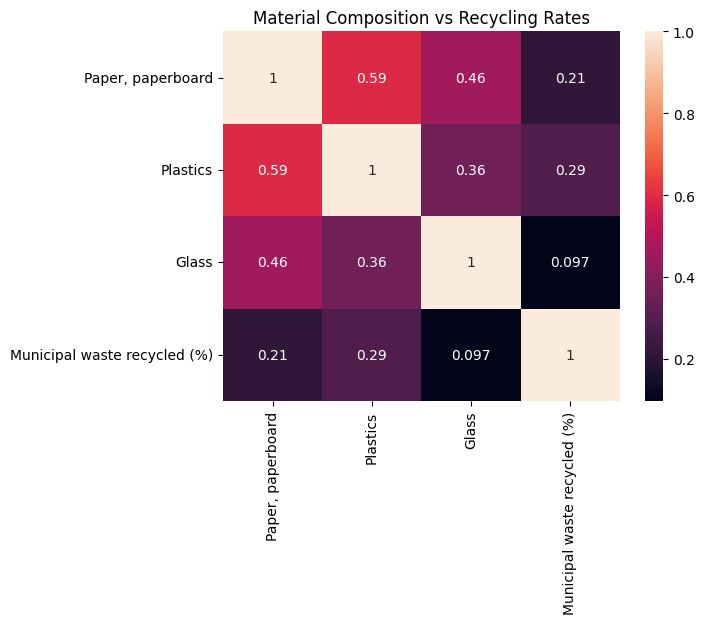

In [82]:
try:
    comp_muni = pd.read_csv('/Composition of Municipal Waste (latest year).csv')
except FileNotFoundError:
    print("Error: '/Composition of Municipal Waste (latest year).csv' not found.")
    exit()
try:
    hazard_percap = pd.read_csv('/Hazardous waste generated per capita.csv')
except FileNotFoundError:
    print("Error: '/Hazardous waste generated per capita.csv' not found.")
    exit()
try:
    hazard_gen = pd.read_csv('/Hazardous waste generated.csv')
except FileNotFoundError:
    print("Error: '/Hazardous waste generated.csv' not found.")
    exit()

try:
    muni_collect = pd.read_csv('/Municipal waste collected.csv')
except FileNotFoundError:
    print("Error: '/Municipal waste collected.csv' not found.")
    exit()
try:
    treatment = pd.read_csv('/Municipal waste treatment (latest year).csv')
except FileNotFoundError:
    print("Error: '/Municipal waste treatment (latest year).csv' not found.")
    exit()
try:
    merged = pd.merge(comp_muni, treatment, on=['CountryID', 'Country'])
except KeyError as e:
    print(f"Error merging dataframes: missing key {e}. Check the 'CountryID' and 'Country' columns in your data.")
    exit()
cols_to_check = ['Paper, paperboard', 'Plastics', 'Glass', 'Municipal waste recycled (%)']
if not all(col in merged.columns for col in cols_to_check):
    missing_cols = [col for col in cols_to_check if col not in merged.columns]
    print(f"Error: The following columns are missing in the merged dataframe: {missing_cols}")
    exit()

for col in cols_to_check:
    print(f"\nData in {col} before numeric conversion: ")
    print(merged[col].head(5))
    merged[col] = pd.to_numeric(merged[col], errors='coerce')
    print(f"\nData in {col} after numeric conversion: ")
    print(merged[col].head(5))
merged.fillna(0, inplace=True)
if not all(col in merged.columns for col in cols_to_check):
    missing_cols = [col for col in cols_to_check if col not in merged.columns]
    print(f"Error: The following columns are missing in the merged dataframe: {missing_cols}")
    exit()
corr_matrix = merged[cols_to_check].corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True)
plt.title('Material Composition vs Recycling Rates')
plt.show()

# ***Spatial Comparison*** ♻

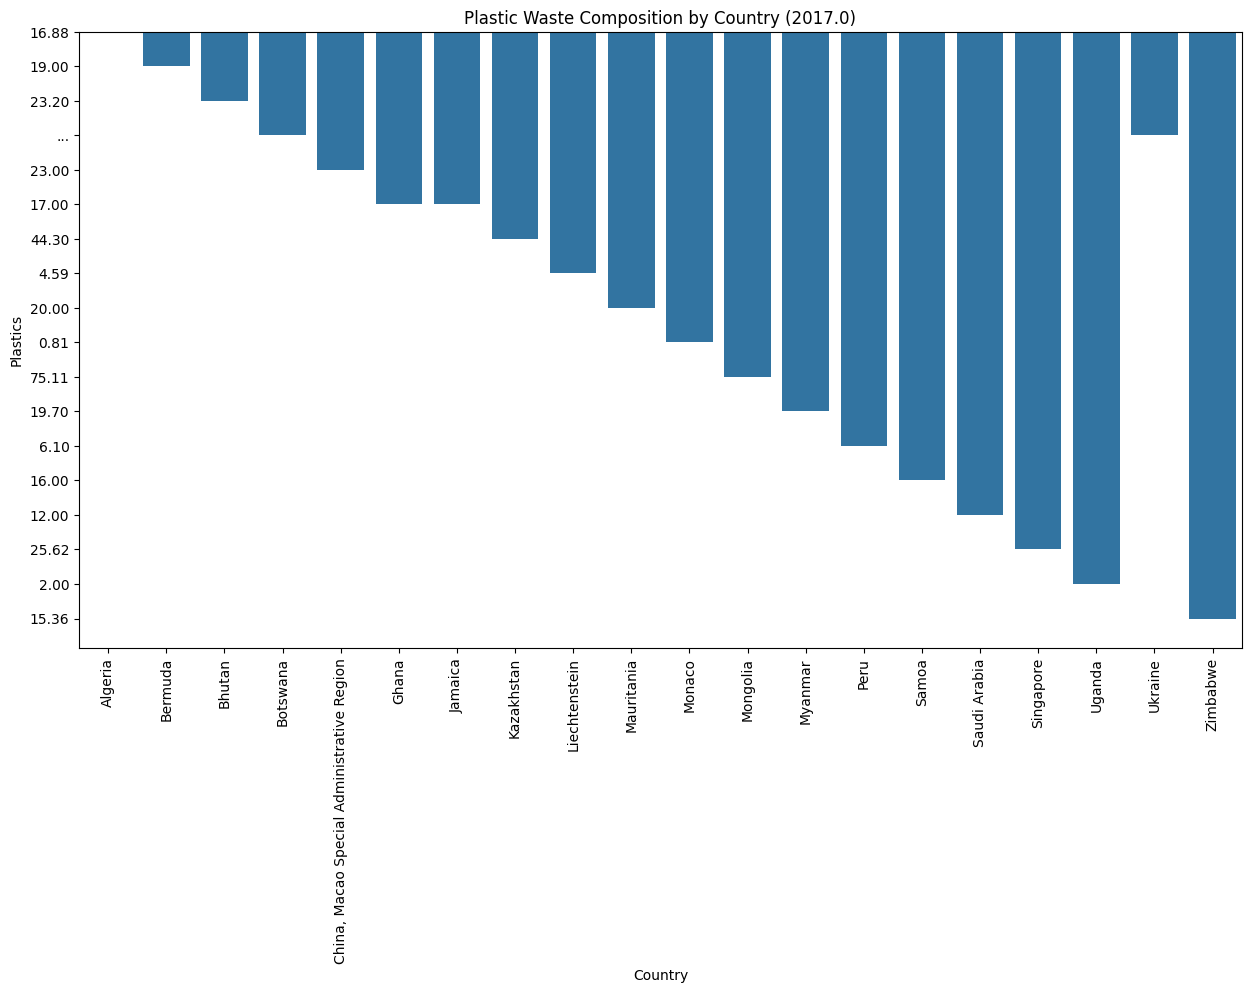

In [83]:
latest_year = comp_muni['Latest year available'].max()
latest_data = comp_muni[comp_muni['Latest year available'] == latest_year]

plt.figure(figsize=(15, 8))
sns.barplot(data=latest_data, x='Country', y='Plastics')
plt.title(f'Plastic Waste Composition by Country ({latest_year})')
plt.xticks(rotation=90)
plt.show()

# **Advanced Analysis (Waste Treatment Evolution)** ⛓

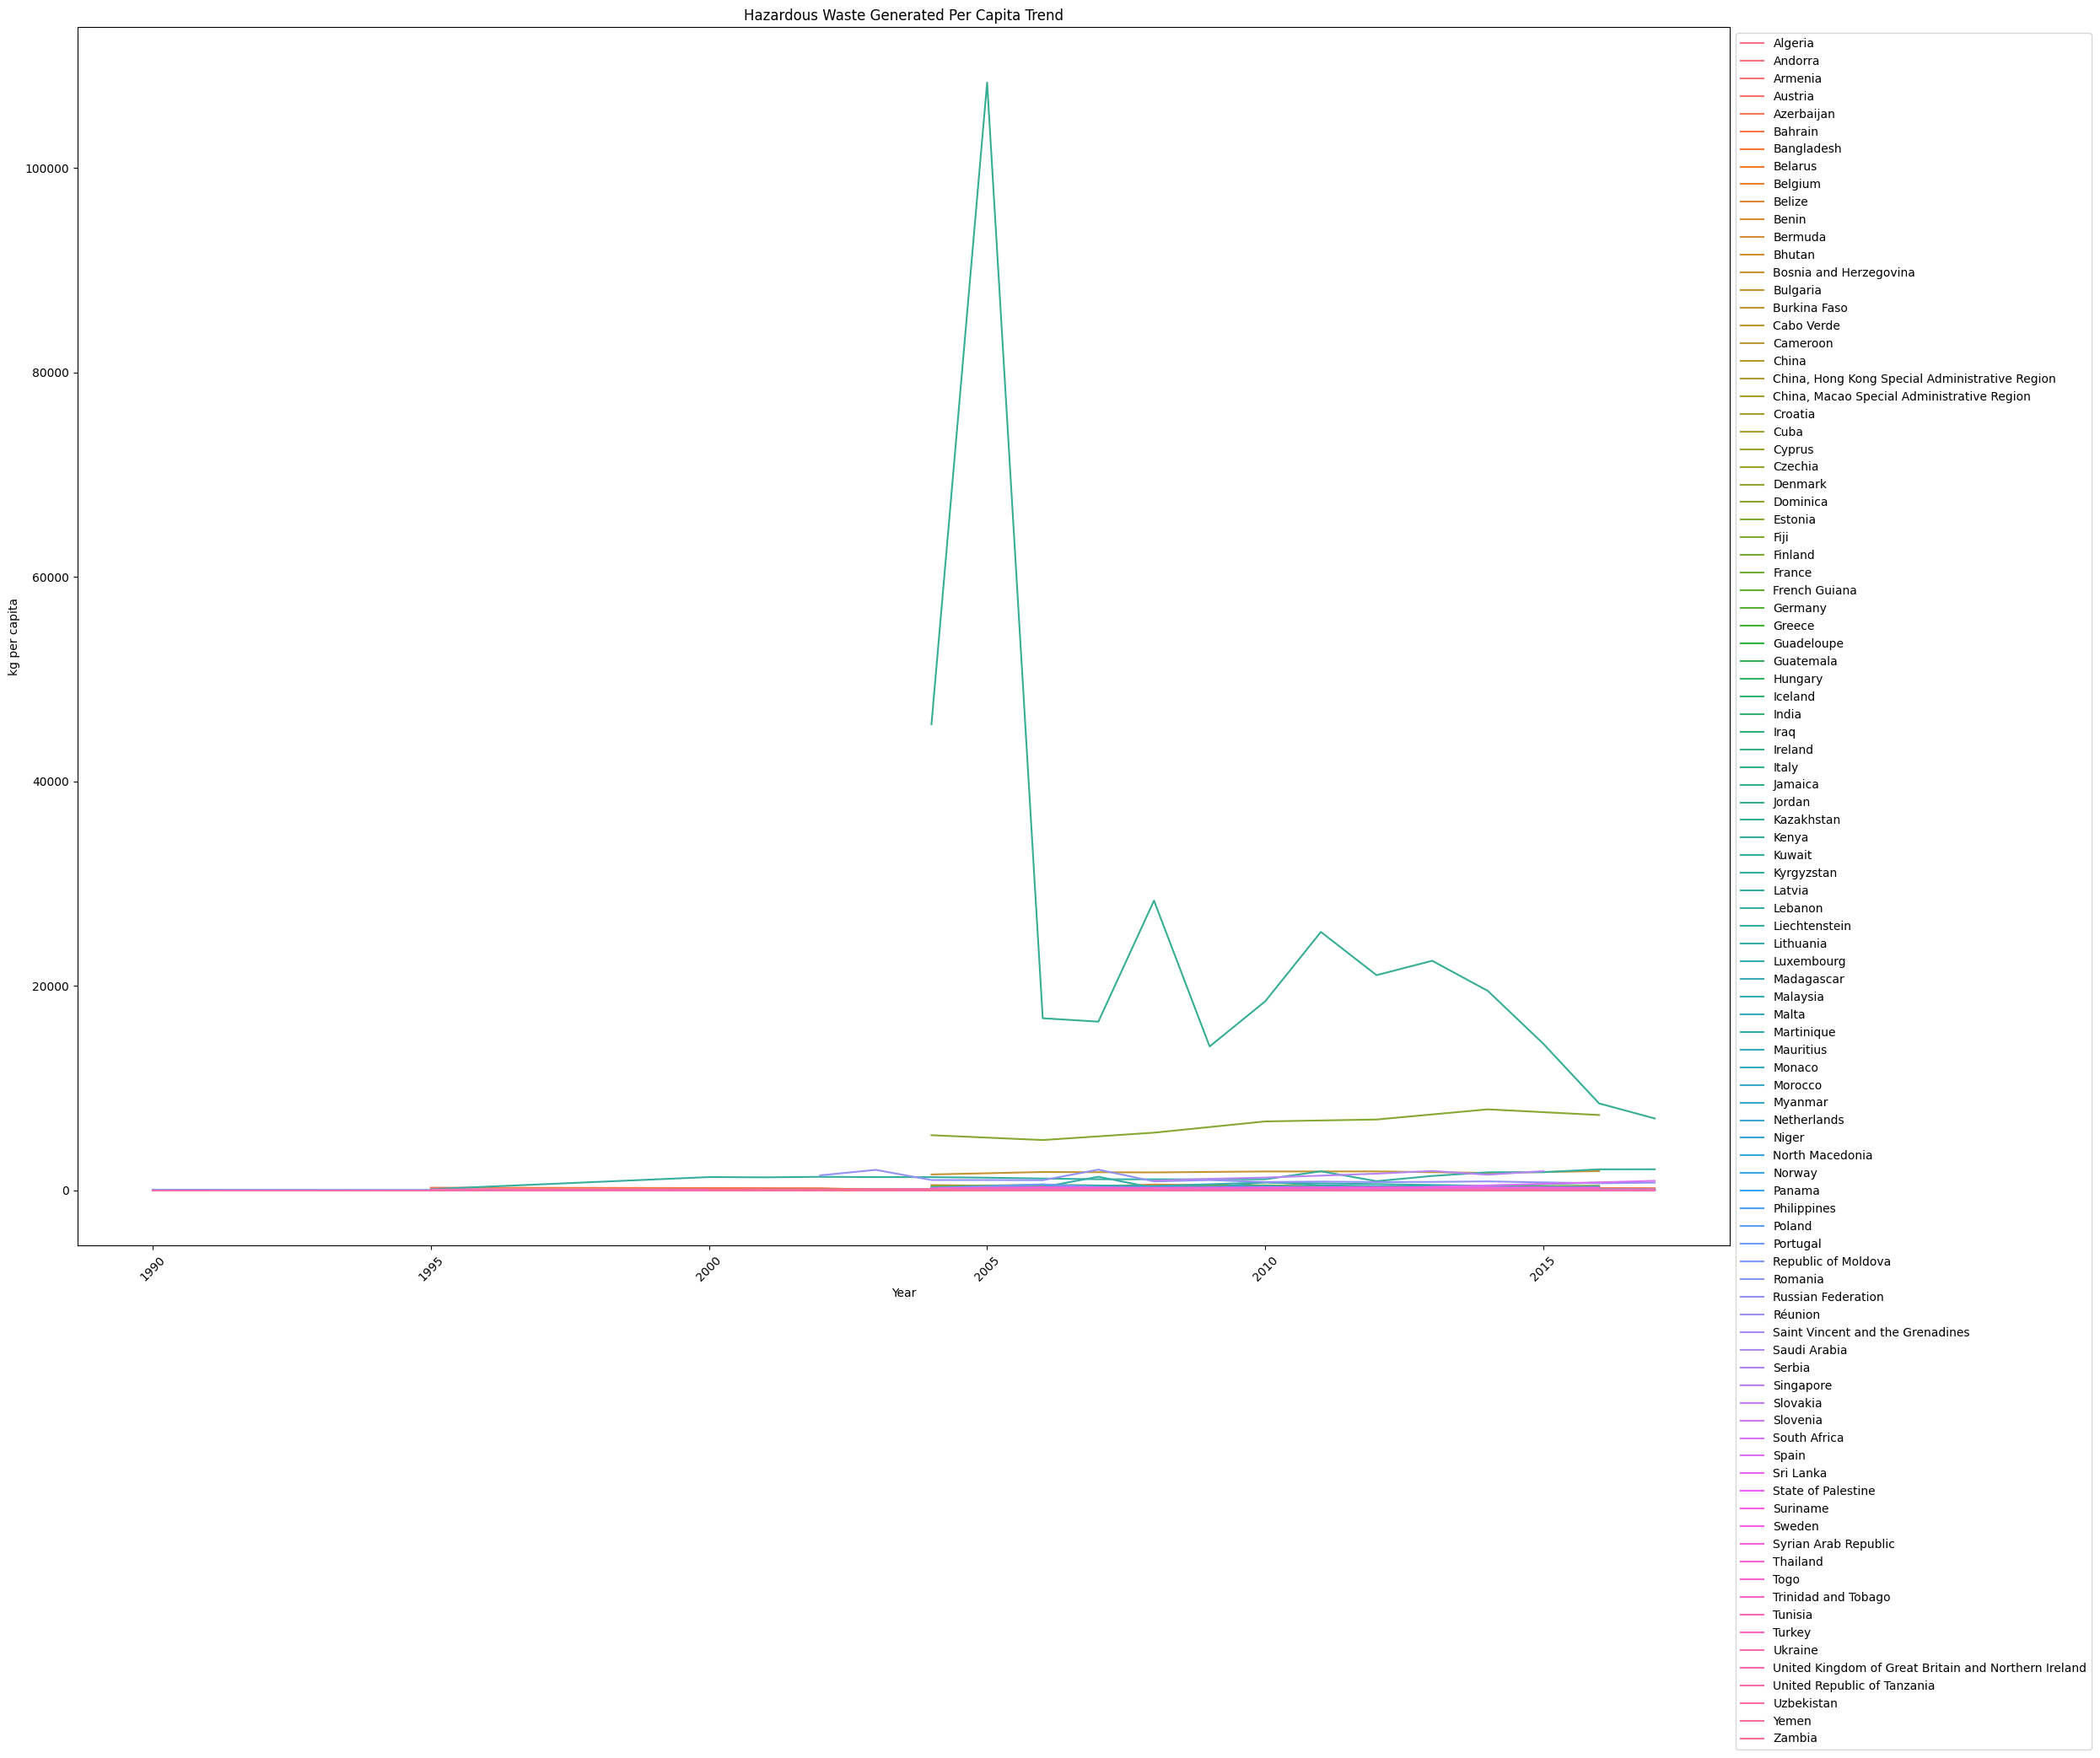

In [85]:
hazard_percap_long['Year'] = pd.to_numeric(hazard_percap_long['Year'], errors='coerce')
hazard_percap_long['Value'] = pd.to_numeric(hazard_percap_long['Value'], errors='coerce')
hazard_gen_long['Year'] = pd.to_numeric(hazard_gen_long['Year'], errors='coerce')
hazard_gen_long['Value'] = pd.to_numeric(hazard_gen_long['Value'], errors='coerce')

latest_year = comp_muni['Latest year available'].max()
latest_data = comp_muni[comp_muni['Latest year available'] == latest_year]
plt.figure(figsize=(25, 20))
sns.lineplot(data=hazard_percap_long, x='Year', y='Value', hue='Country')
plt.title('Hazardous Waste Generated Per Capita Trend')
plt.ylabel('kg per capita')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()